Hunter S. DiCicco

DS440-002: Data Science Capstone

Dr. Rigas, for Drs. Niki and Paris Von Lockette

# Penn State Public Policy: Estimating the Upper Bound of the United States Innovative Capacity
## Model Exploration
### Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

### Data Read

When we read in the `CZChar` dataset, we skip the first five rows which contain human-readable information. The sixth row is the header.

In [2]:
czc = pd.read_csv("../project/volume/data/raw/czchar.csv",
                  skiprows=list(range(6))+[7],
                  header=0)

ipumsA = pd.read_csv("../project/volume/data/interim/ipums_filtered.csv")

In [3]:
ipumsA.head()

vetstatd  schltype  school  vetstat    incss  incwelfr  citizen  hhincome  \
0      11.0       0.0     1.0      1.0      0.0       0.0      0.0    9205.0   
1      11.0       0.0     1.0      1.0      0.0       0.0      0.0   42930.0   
2      11.0       0.0     1.0      1.0      0.0       0.0      0.0   46010.0   
3      11.0       0.0     1.0      1.0      0.0       0.0      0.0    7225.0   
4       0.0       2.0     2.0      0.0  99999.0   99999.0      0.0   41075.0   

   incinvst  mortgag2  mortgage  gradeatt  gradeattd  metro  
0       0.0       1.0       3.0       0.0        0.0    4.0  
1       0.0       1.0       3.0       0.0        0.0    4.0  
2       0.0       2.0       3.0       0.0        0.0    4.0  
3      25.0       0.0       0.0       0.0        0.0    4.0  
4  999999.0       1.0       3.0       5.0       51.0    4.0

In [4]:
ipumsA.describe()

vetstatd      schltype        school       vetstat         incss  \
count  73538.000000  73538.000000  73538.000000  73538.000000  73538.000000   
mean       9.296758      1.167682      1.231105      0.856401  21258.885039   
std        5.455925      0.801610      0.486031      0.522728  39077.481281   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      1.000000      1.000000      1.000000      0.000000   
50%       11.000000      1.000000      1.000000      1.000000      0.000000   
75%       11.000000      2.000000      2.000000      1.000000  13379.000000   
max       22.000000      6.000000      2.000000      2.000000  99999.000000   

           incwelfr       citizen      hhincome       incinvst      mortgag2  \
count  73538.000000  73538.000000  7.353800e+04   73538.000000  73538.000000   
mean   19544.282017      0.401656  4.277716e+05  196590.214284      0.684027   
std    39595.782915      0.929116  1.815460e+06  395610.129425      1.024643   
min        0.000000      0.000000 -1.400000e+04  -10000.000000      0.000000   
25%        0.000000      0.000000  2.670000e+04       0.000000      0.000000   
50%        0.000000      0.000000  5.787200e+04       0.000000      0.000000   
75%        0.000000      0.000000  1.143935e+05    3000.000000      1.000000   
max    99999.000000      3.000000  9.999999e+06  999999.000000      5.000000   

           mortgage      gradeatt     gradeattd         metro  
count  73538.000000  73538.000000  73538.000000  73538.000000  
mean       1.559493      1.122794     11.558813      3.055835  
std        1.390320      2.049489     21.001575      0.827778  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      3.000000  
50%        1.000000      0.000000      0.000000      3.000000  
75%        3.000000      1.000000     10.000000      4.000000  
max        4.000000      7.000000     74.000000      4.000000

### Fitting an Extra Trees Regressor

We fit an `ExtraTreesRegressor` using the Gini index as the response to explore which of the features provided best explain the measured income inequality in a given area. If we know what describes economic prosperity we might be able to use that information when we formulate our metric.

In case of future additions and preprocessing steps, I've fitted the regressor in a `Pipeline`. When we call `Pipeline.fit()`, all of the transformations and estimators in the pipeline are fitted sequentially.

In [5]:
est = [('clf', ExtraTreesRegressor(n_estimators=15))]
pl = Pipeline(est)

In [6]:
cols = ['Income Growth 2000-2006/10',
        'State EITC Exposure',
        'School Expenditure per Student',
        'Labor Force Participation Rate',
        'Social Capital Index']

# drop NAs on the features of interest
czc = czc.dropna(subset=cols)

y = czc['Gini']

x = czc[cols]

pl.fit(x, y)

Pipeline(memory=None,
         steps=[('clf',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=15, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
         verbose=False)

This fit includes *feature importance* measurements out of the box – these describe how much non-mutual information each feature contributed in the `ExtraTrees` ensemble. It also shows which features decreased the impurity the most per split.

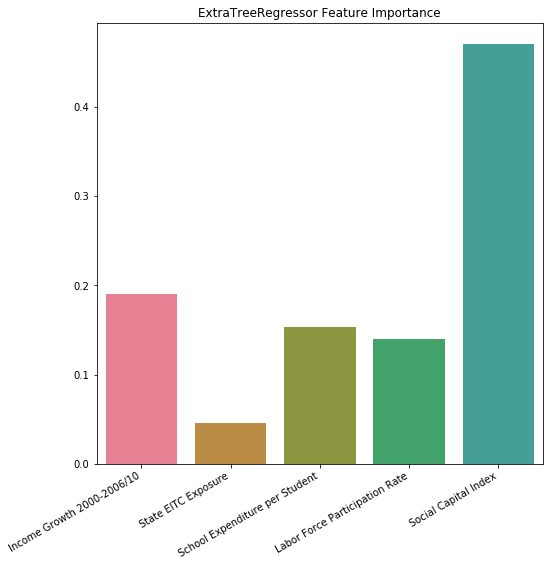

In [7]:
fig, ax = plt.subplots(figsize=(8,9))
sns.barplot(cols, pl['clf'].feature_importances_,
           palette=sns.color_palette("husl", 8),
           ax=ax)
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.title(f"{str(pl['clf'].base_estimator_).split('(')[0]} Feature Importance");

Next I just wanted to see how correlated SCI and Gini index are.

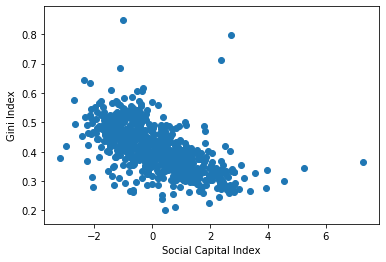

In [8]:
plt.scatter(czc['Social Capital Index'], czc['Gini']);
plt.xlabel('Social Capital Index');
plt.ylabel('Gini Index');

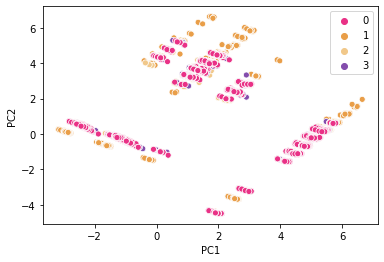

In [9]:
pcdf = pd.read_csv('../project/volume/data/interim/ipums_PCA10.csv')
km = KMeans(n_clusters=4)
km_labels = km.fit_predict(pcdf)

sns.scatterplot(pcdf['PC1'], pcdf['PC2'], hue=km_labels, palette=sns.color_palette(['#e93186', '#e99e48', '#f1c88a', '#834dac']));

In [10]:
y = pd.get_dummies(km_labels).to_numpy()
pl.set_params(clf=ExtraTreesClassifier(n_estimators=80))
pl.fit(ipumsA, y)

Pipeline(memory=None,
         steps=[('clf',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=80, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

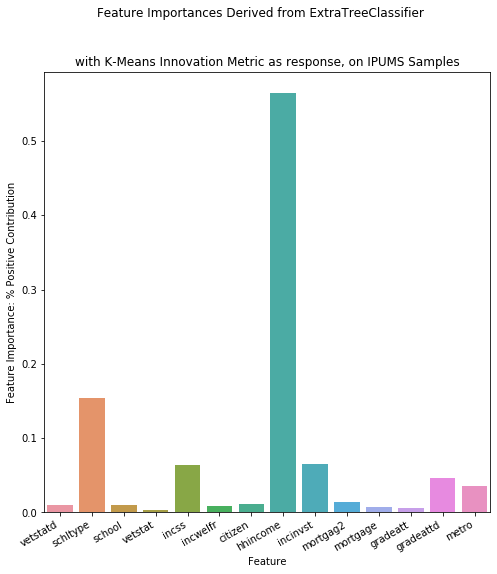

In [11]:
fig, ax = plt.subplots(figsize=(8,9))
sns.barplot(ipumsA.columns, pl['clf'].feature_importances_)
plt.xticks(rotation=45);
fig.autofmt_xdate()
plt.suptitle(f"Feature Importances Derived from {str(pl['clf'].base_estimator_).split('(')[0]}");
plt.title("with K-Means Innovation Metric as response, on IPUMS Samples");
plt.ylabel("Feature Importance: % Positive Contribution");
plt.xlabel("Feature");